### 서울시 유가 정보 분석

In [27]:
import pandas as pd
import numpy as np

In [9]:
# folder에 file name 가져오기
from glob import glob

In [3]:
#!pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 4.3 MB/s eta 0:00:00


In [10]:
# glob 이용해서 모든 fileName 불러오기
station_files = glob('../Data/Oil/*.xls')
station_files

['../Data/Oil/지역_위치별(주유소) (9).xls',
 '../Data/Oil/지역_위치별(주유소) (12).xls',
 '../Data/Oil/지역_위치별(주유소) (5).xls',
 '../Data/Oil/지역_위치별(주유소) (24).xls',
 '../Data/Oil/지역_위치별(주유소) (4).xls',
 '../Data/Oil/지역_위치별(주유소) (13).xls',
 '../Data/Oil/지역_위치별(주유소) (8).xls',
 '../Data/Oil/지역_위치별(주유소) (3).xls',
 '../Data/Oil/지역_위치별(주유소) (18).xls',
 '../Data/Oil/지역_위치별(주유소) (22).xls',
 '../Data/Oil/지역_위치별(주유소) (14).xls',
 '../Data/Oil/지역_위치별(주유소) (15).xls',
 '../Data/Oil/지역_위치별(주유소) (23).xls',
 '../Data/Oil/지역_위치별(주유소) (19).xls',
 '../Data/Oil/지역_위치별(주유소) (2).xls',
 '../Data/Oil/지역_위치별(주유소) (20).xls',
 '../Data/Oil/지역_위치별(주유소) (1).xls',
 '../Data/Oil/지역_위치별(주유소) (16).xls',
 '../Data/Oil/지역_위치별(주유소) (17).xls',
 '../Data/Oil/지역_위치별(주유소) (0).xls',
 '../Data/Oil/지역_위치별(주유소) (21).xls',
 '../Data/Oil/지역_위치별(주유소) (10).xls',
 '../Data/Oil/지역_위치별(주유소) (7).xls',
 '../Data/Oil/지역_위치별(주유소) (6).xls',
 '../Data/Oil/지역_위치별(주유소) (11).xls']

In [18]:
# df 쌓을 리스트
tmp_raw = []

for file_name in station_files:
    tmp = pd.read_excel(file_name,header=2)
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),현대오일뱅크,02-955-5185,N,-,1525,1585,1400
1,서울특별시,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),S-OIL,02-992-0220,Y,-,1525,1585,-
2,서울특별시,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),현대오일뱅크,02-954-4555,Y,1760,1525,1585,-
3,서울특별시,현대오일뱅크㈜직영 도봉현대셀프주유소,서울 도봉구 도봉로 941 (도봉동),현대오일뱅크,02-3492-7371,Y,-,1529,1599,-
4,서울특별시,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),SK에너지,02-992-5561,Y,-,1535,1585,1500


In [22]:
station_raw.shape

(443, 10)

In [31]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 8
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      443 non-null    object
 1   상호      443 non-null    object
 2   주소      443 non-null    object
 3   상표      443 non-null    object
 4   전화번호    443 non-null    object
 5   셀프여부    443 non-null    object
 6   고급휘발유   443 non-null    int64 
 7   휘발유     443 non-null    int64 
 8   경유      443 non-null    int64 
 9   실내등유    443 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 38.1+ KB


In [30]:
station_raw['고급휘발유']=station_raw['고급휘발유'].replace('-',0)
station_raw['고급휘발유']=station_raw['고급휘발유'].astype(np.int64)

station_raw['실내등유']=station_raw['실내등유'].replace('-',0)
station_raw['실내등유']=station_raw['실내등유'].astype(np.int64)

In [37]:
# 필요 항목 발췌
stations = pd.DataFrame(
    {
        'Oil_store':station_raw['상호'],
        '주소':station_raw['주소'],
        '가격':station_raw['휘발유'],
        '셀프':station_raw['셀프여부'],
        '상표':station_raw['상표']
    }
)

stations.head()

,Oil_store,주소,가격,셀프,상표
0,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1525,N,현대오일뱅크
1,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),1525,Y,S-OIL
2,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1525,Y,현대오일뱅크
3,현대오일뱅크㈜직영 도봉현대셀프주유소,서울 도봉구 도봉로 941 (도봉동),1529,Y,현대오일뱅크
4,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1535,Y,SK에너지


In [35]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 8
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  443 non-null    object
 1   주소         443 non-null    object
 2   가격         443 non-null    int64 
 3   셀프         443 non-null    object
 4   상표         443 non-null    object
dtypes: int64(1), object(4)
memory usage: 20.8+ KB


In [55]:
# 주유소별 자치구 항목 추가
stations['자치구']=[ addr.split(' ')[1].strip() for addr in stations['주소']]

In [70]:
# unique값 찍어보기
stations['자치구'].unique()

array(['도봉구', '마포구', '광진구', '중랑구', '관악구', '서대문구', '노원구', '강서구', '양천구',
       '종로구', '서초구', '성동구', '중구', '영등포구', '강북구', '용산구', '강동구', '성북구',
       '송파구', '강남구', '은평구', '동대문구', '금천구', '구로구', '동작구'], dtype=object)

In [77]:
# index 번호 초기화
stations.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  443 non-null    object
 1   주소         443 non-null    object
 2   가격         443 non-null    int64 
 3   셀프         443 non-null    object
 4   상표         443 non-null    object
 5   자치구        443 non-null    object
dtypes: int64(1), object(5)
memory usage: 20.9+ KB


---
### 데이터 시각화

In [78]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

In [83]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [80]:
warnings.filterwarnings('ignore')

### 1번 방식 박스플롯

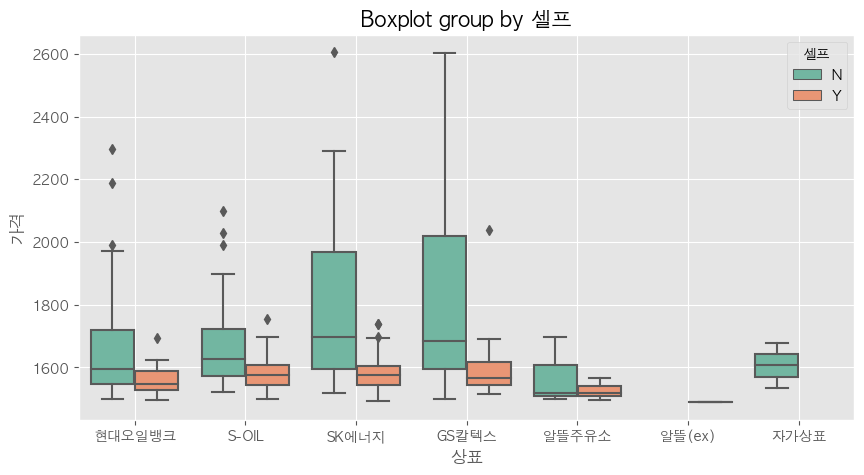

In [97]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))

sns.boxplot(
	x='상표',
    y='가격',
    hue='셀프',
    data=stations,
    palette='Set2'
)

plt.title('Boxplot group by 셀프',size=15)
plt.grid(True)

plt.show()

### 2번 방식 박스 플롯

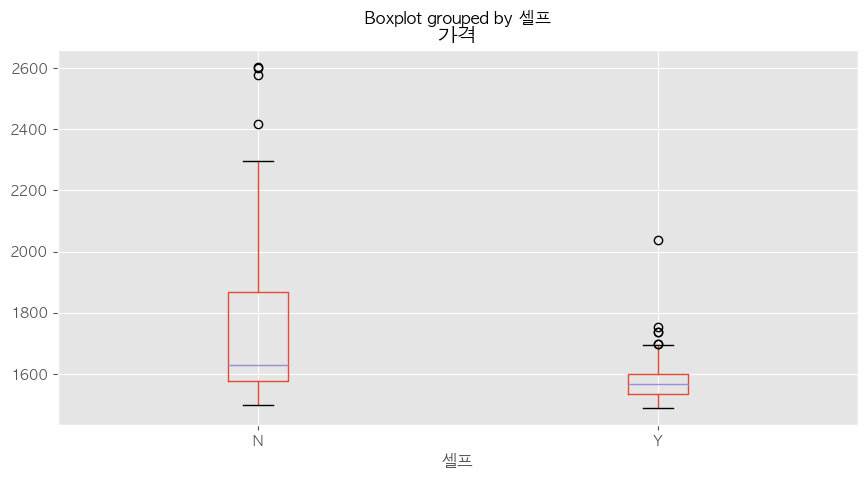

In [98]:
stations.boxplot(
    column='가격',
    by='셀프',
    figsize=(10,5)
)

plt.show()

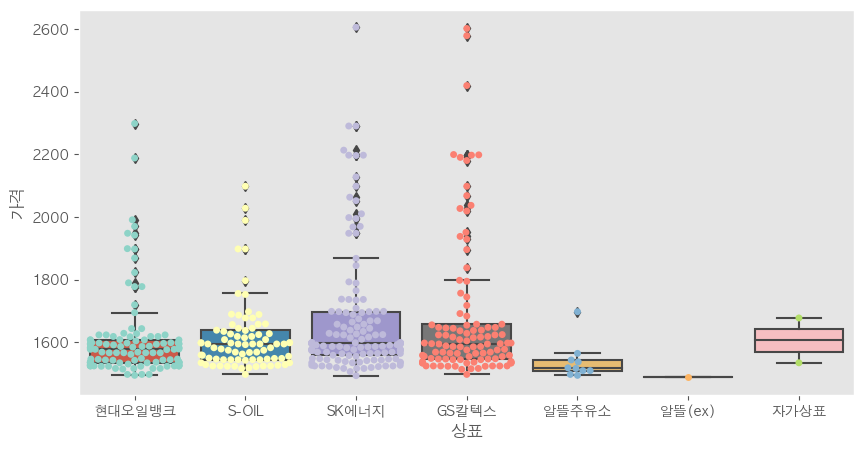

In [108]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))

sns.boxplot(
	x='상표',
    y='가격',
    data=stations,
)

sns.swarmplot(
    x='상표',
    y='가격',
    data=stations,
    palette='Set3'
)

plt.grid(False)

plt.show()

In [129]:
# 가격이 높은 순으로 정렬 (top10)
stations_sort=stations.sort_values(by='가격',ascending=False)
stations_sort

,Oil_store,주소,가격,셀프,상표,자치구
218,서남주유소,서울 중구 통일로 30,2605,N,SK에너지,중구
269,서계주유소,서울 용산구 청파로 367 (청파동),2601,N,GS칼텍스,용산구
369,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578,N,GS칼텍스,강남구
217,필동주유소,서울 중구 퇴계로 196 (필동2가),2419,N,GS칼텍스,중구
368,(주)새서울네트웍스 제이제이주유소,서울 강남구 언주로 716,2298,N,현대오일뱅크,강남구
...,...,...,...,...,...,...
134,현대오일뱅크(주)직영 양정주유소,서울 양천구 국회대로 158 (신정동),1498,N,현대오일뱅크,양천구
98,화곡역주유소,서울 강서구 강서로 154 (화곡동),1495,Y,알뜰주유소,강서구
99,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1495,Y,현대오일뱅크,강서구
370,타이거주유소,서울 은평구 수색로 188 (증산동),1494,Y,SK에너지,은평구


In [136]:
# 가장 비싼 지역과 싼 지역의 차이
stations['가격'].max() - stations['가격'].min()

1116

In [144]:
# 구별 가격 평균
stations_gu_mean=stations.pivot_table(index='자치구',aggfunc=np.mean)
stations_gu_mean.sort_values(by='가격',ascending=False)
stations_gu_mean

,가격
자치구,
강남구,1867.545455
강동구,1672.500000
강북구,1535.250000
강서구,1585.939394
관악구,1628.642857
광진구,1577.846154
구로구,1622.750000
금천구,1587.909091
노원구,1610.800000


In [137]:
import json
import folium

In [147]:
geo_path = '../Data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path,encoding='utf-8'))

map = folium.Map(
    [37.55, 126.98],
    zoom_start = 10,
    tiles='Stamen Toner'
)

folium.Choropleth(
    geo_data=geo_str,
    data=stations_gu_mean,
    columns=[stations_gu_mean.index , '가격'],
    fill_color='YlOrRd',
    key_on='feature.p'
).add_to(map)

map

---
### Top 10 / Worst 10  뽑기

#### 위도 경도 뽑아오기

In [150]:
stations_addr=stations['주소']

In [151]:
# 네이버 open api 이용하기 
url = 'https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query={addr}'
header = {'X-NCP-APIGW-API-KEY-ID': '2hossypbwr','X-NCP-APIGW-API-KEY': '7claUZjZEE9LdX6NcmFcROjdNXAqQUqafb1wBrE4'}

In [153]:
import time
import urllib.request

In [154]:
lat = []
lng = []
wrong = []
index = 0
index_list = []
for address in stations_addr:
    try:
        encText =urllib.parse.quote(address)
        url = 'https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query='+ encText
        request = urllib.request.Request(url)
        request.add_header("X-NCP-APIGW-API-KEY-ID",'2hossypbwr')
        request.add_header("X-NCP-APIGW-API-KEY",'7claUZjZEE9LdX6NcmFcROjdNXAqQUqafb1wBrE4')
        response = urllib.request.urlopen(request)
        rescode = response.getcode()
        if(rescode==200):
            response_body = response.read()
            entext = response_body.decode('utf-8')
        else:
            print("Error Code:" + rescode)
        
        data = json.loads(entext)
        lat.append(data['addresses'][0]['y'])
        lng.append(data['addresses'][0]['x'])
        index += 1
    except Exception as e:
        print(e)
        print(address)
        wrong.append(address)
        index_list.append(index)
        lat.append('')
        lng.append('')
        index += 1

print(lat , lng , wrong, index_list)
print(len(lat),len(lng))

list index out of range
서울 영등포구 국회대로52길 9-13 (영등포동7가)
['37.6744899', '37.6540787', '37.6631109', '37.6883643', '37.6449810', '37.6674546', '37.6615036', '37.6446305', '37.6468447', '37.6414474', '37.6624273', '37.6843740', '37.6624131', '37.6790576', '37.6490767', '37.6622876', '37.5597811', '37.5674699', '37.5643352', '37.5631721', '37.5587411', '37.5498770', '37.5463009', '37.5430226', '37.5459620', '37.5421144', '37.5493237', '37.5505830', '37.5556484', '37.5451281', '37.5658943', '37.5693068', '37.5313243', '37.5618543', '37.5675260', '37.5645598', '37.5597342', '37.5550356', '37.5457285', '37.5381170', '37.5476454', '37.5872239', '37.5840838', '37.5791157', '37.5926618', '37.5862830', '37.5891163', '37.5923888', '37.5946370', '37.6147722', '37.6141101', '37.5910181', '37.5798895', '37.6092265', '37.4804301', '37.4824245', '37.4778742', '37.4772176', '37.4649731', '37.4932356', '37.4916243', '37.4788051', '37.4726570', '37.4737578', '37.4791086', '37.4830324', '37.4823499', '37.473

In [156]:
stations['위도']= lat
stations['경도'] =lng

In [159]:
top10=stations.sort_values(by='가격').head(10)
worst10=stations.sort_values(by='가격').tail(10)

In [160]:
top10

,Oil_store,주소,가격,셀프,상표,자치구,위도,경도
163,만남의광장주유소,서울 서초구 양재대로12길 73-71,1489,Y,알뜰(ex),서초구,37.4602299,127.0419172
370,타이거주유소,서울 은평구 수색로 188 (증산동),1494,Y,SK에너지,은평구,37.5785603,126.9020486
98,화곡역주유소,서울 강서구 강서로 154 (화곡동),1495,Y,알뜰주유소,강서구,37.5407640,126.8414743
99,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1495,Y,현대오일뱅크,강서구,37.5492854,126.8469821
134,현대오일뱅크(주)직영 양정주유소,서울 양천구 국회대로 158 (신정동),1498,N,현대오일뱅크,양천구,37.5280600,126.8525902
100,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1498,N,알뜰주유소,강서구,37.5315671,126.8560525
41,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),1498,N,현대오일뱅크,중랑구,37.5872239,127.0802971
131,현대주유소,서울 양천구 남부순환로 372 (신월동),1498,Y,S-OIL,양천구,37.5339098,126.8291785
132,현대오일뱅크(주)직영 남부순환셀프주유소,서울 양천구 남부순환로 553 (신월동),1498,Y,현대오일뱅크,양천구,37.5197367,126.8387336
133,플라트(주)서호주유소,서울 양천구 남부순환로 317,1498,N,GS칼텍스,양천구,37.5385853,126.8270205


In [161]:
worst10

,Oil_store,주소,가격,셀프,상표,자치구,위도,경도
433,구로주유소,서울 구로구 구로동로 137 (구로동),2198,N,GS칼텍스,구로구,37.4910161,126.8835185
245,SJ오일(주) 여의도주유소,서울 영등포구 은행로 64,2199,N,GS칼텍스,영등포구,37.5303764,126.9255701
268,한석주유소,서울 용산구 이촌로 164,2213,N,SK에너지,용산구,37.5215820,126.9653682
367,SK논현주유소,서울 강남구 논현로 747 (논현동),2290,N,SK에너지,강남구,37.5185084,127.0282515
366,갤러리아주유소,서울 강남구 압구정로 426,2290,N,SK에너지,강남구,37.5268137,127.0435952
368,(주)새서울네트웍스 제이제이주유소,서울 강남구 언주로 716,2298,N,현대오일뱅크,강남구,37.5176843,127.0358441
217,필동주유소,서울 중구 퇴계로 196 (필동2가),2419,N,GS칼텍스,중구,37.5609181,126.9936785
369,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578,N,GS칼텍스,강남구,37.5115603,127.0471387
269,서계주유소,서울 용산구 청파로 367 (청파동),2601,N,GS칼텍스,용산구,37.5523505,126.9689935
218,서남주유소,서울 중구 통일로 30,2605,N,SK에너지,중구,37.5583881,126.9721764


In [164]:
map=folium.Map(
    [37.55, 126.98],
    zoom_start = 10
)

for lat , lng ,name in zip(top10['위도'], top10['경도'], top10['Oil_store']):
    folium.Marker(
        [lat,lng],
        popup=name
    ).add_to(map)

for lat , lng , name in zip(worst10['위도'], worst10['경도'], worst10['Oil_store']):
    folium.Marker(
        [lat,lng],
        icon=folium.Icon(color = 'red'),
        popup=name
    ).add_to(map)

map